# KNN

In [61]:
import numpy as np
import pandas as pd
import time
from scipy.spatial.distance import euclidean
from scipy import stats
from matplotlib import pyplot as plt

In [62]:
def splitDataset(data, splitRatio, number_of_rows):
    # Shuffled data
    data_copy = data.copy()
    np.random.shuffle(data_copy)
    
    # Cut dataset:
    data_part = data_copy[:int(number_of_rows)]
    
    # Training set size 
    trainSize = int(len(data_part) * splitRatio)
    
    #Split data
    data_train = data_part[: trainSize]
    data_test = data_part[trainSize : data.shape[0]]
    
    return data_train, data_test

In [63]:
def calc_all_distancies(data_x, unknown):
    '''
        Function calculates distancies between each pairs of known and unknown points
    '''
    num_pred = unknown.shape[0]
    num_data = data_x.shape[0]
    dists = np.zeros((num_pred,num_data))
    for i in range(num_pred):
        for j in range(num_data):
            dists[i,j] = euclidean(unknown[i],data_x[j])
    return dists

In [64]:
def predict(dists, data_y, k):
    '''
        Function predicts the class of the unknown point by the k nearest neighbours
    '''
    num_pred = dists.shape[0]
    y_pred = np.zeros(num_pred)
    for j in range(num_pred):
        dst = dists[j]
        closest_y = data_y[dst.argsort()[:k]]
        y_pred[j] = stats.mode(closest_y, axis=None).mode
    return y_pred

In [65]:
def accuracy(predicted,real):
    '''
        Calculates accuracy percentage
    '''
    total = len(real)
    s = sum(real == predicted)
    return 100*s/total

In [66]:
def compare_k(data_x, data_y, test_x, test_y, kmin=1, kmax=50, kstep=4):
    '''
        Main comparing function
    '''
    k = list(range(kmin, kmax, kstep))
    steps = len(k)
    features = np.zeros((steps,3))
    
    print('Evaluating distancies started')
    
    t0 = time.time()
    distancies = calc_all_distancies(data_x,test_x)
    miss = []
    t = time.time()
    s1 = data_x.shape[0]
    s2 = test_x.shape[0]
    
    print('Distancies completed in %d seconds for %dx%d' %(t-t0,s1,s2))
    
    for j in range(steps):
        t0 = time.time()
        yk = predict(distancies,data_y,k[j])
        t = time.time() - t0
        features[j][0] = k[j]
        features[j][1] = accuracy(yk,test_y)
        features[j][2] = t
        cond = yk!=test_y
        miss.append({
            'k':k[j],
            'acc':features[j][1],
            'x':test_x[cond]}
        )
        
        print('k={0}, accuracy = {1}%, time = {2} sec'.format(k[j],features[j][1],features[j][2]))
        
    return features, miss

In [67]:
data = np.genfromtxt("Skin_NonSkin.txt", delimiter = "\t")
print('Data shape: ', data.shape)


Data shape:  (245057, 4)


## Select some part of data to be tested

In [73]:
number_of_rows = 1000
points = data[:int(number_of_rows)]

ratio = 0.67 
data_train, data_test = splitDataset(data, ratio, number_of_rows)
train_Y = data_train[:, -1]
train_X = data_train[:, range(0, 3)]
test_Y = data_test[:, -1]
test_X = data_test[:, range(0, 3)]


In [74]:
print(x_trn.shape)
print(x_tst.shape)

(670, 3)
(330, 3)


## Calculate distancies & compare result for different k

In [75]:
res, ms = compare_k(x_trn, y_trn, x_tst, y_tst,1,201,20)

Evaluating distancies started
Distancies completed in 30 seconds for 670x330
k=1, accuracy = 100.0%, time = 0.12500715255737305 sec
k=21, accuracy = 100.0%, time = 0.17200970649719238 sec
k=41, accuracy = 100.0%, time = 0.13100743293762207 sec
k=61, accuracy = 100.0%, time = 0.15700888633728027 sec
k=81, accuracy = 100.0%, time = 0.13400769233703613 sec
k=101, accuracy = 100.0%, time = 0.1520087718963623 sec
k=121, accuracy = 100.0%, time = 0.13300752639770508 sec
k=141, accuracy = 100.0%, time = 0.1540086269378662 sec
k=161, accuracy = 100.0%, time = 0.13600754737854004 sec
k=181, accuracy = 100.0%, time = 0.15900921821594238 sec


## Visualisation

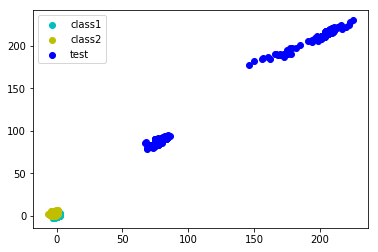

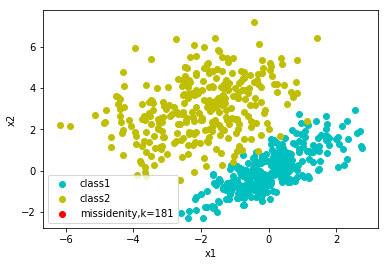

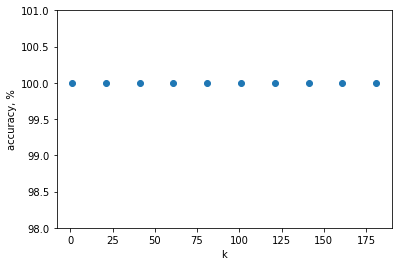

In [76]:
# initial data
fig = plt.figure()
plt.scatter(x1[:, 0], x1[:, 1], color='c',label='class1')
plt.scatter(x2[:, 0], x2[:, 1], color='y',label='class2')
# randomly selected data
plt.scatter(x_tst[:,0],x_tst[:,1],color='b',label='test')
plt.legend(loc='best')


# missidentifies for k = value
plt.figure()
plt.scatter(x1[:, 0], x1[:, 1], color='c', label='class1')
plt.scatter(x2[:, 0], x2[:, 1], color='y', label='class2')
plt.scatter(ms[-1]['x'][:,0],ms[-1]['x'][:,1],color='r',label='missidenity,k=%d'%ms[-1]['k'])
plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('x2')
plt.figure()

# accuracy plot
k = plt.scatter(res[:, 0], res[:, 1])
plt.ylim(min(res[:, 1]) - 2, max(res[:, 1])+1, 4)
plt.xlabel('k')
plt.ylabel('accuracy, %')
plt.show()